Justin Yu STA 365 Homework #2 Student Number: 1006747111

# Homework #2 Part I:

**Q 1:**

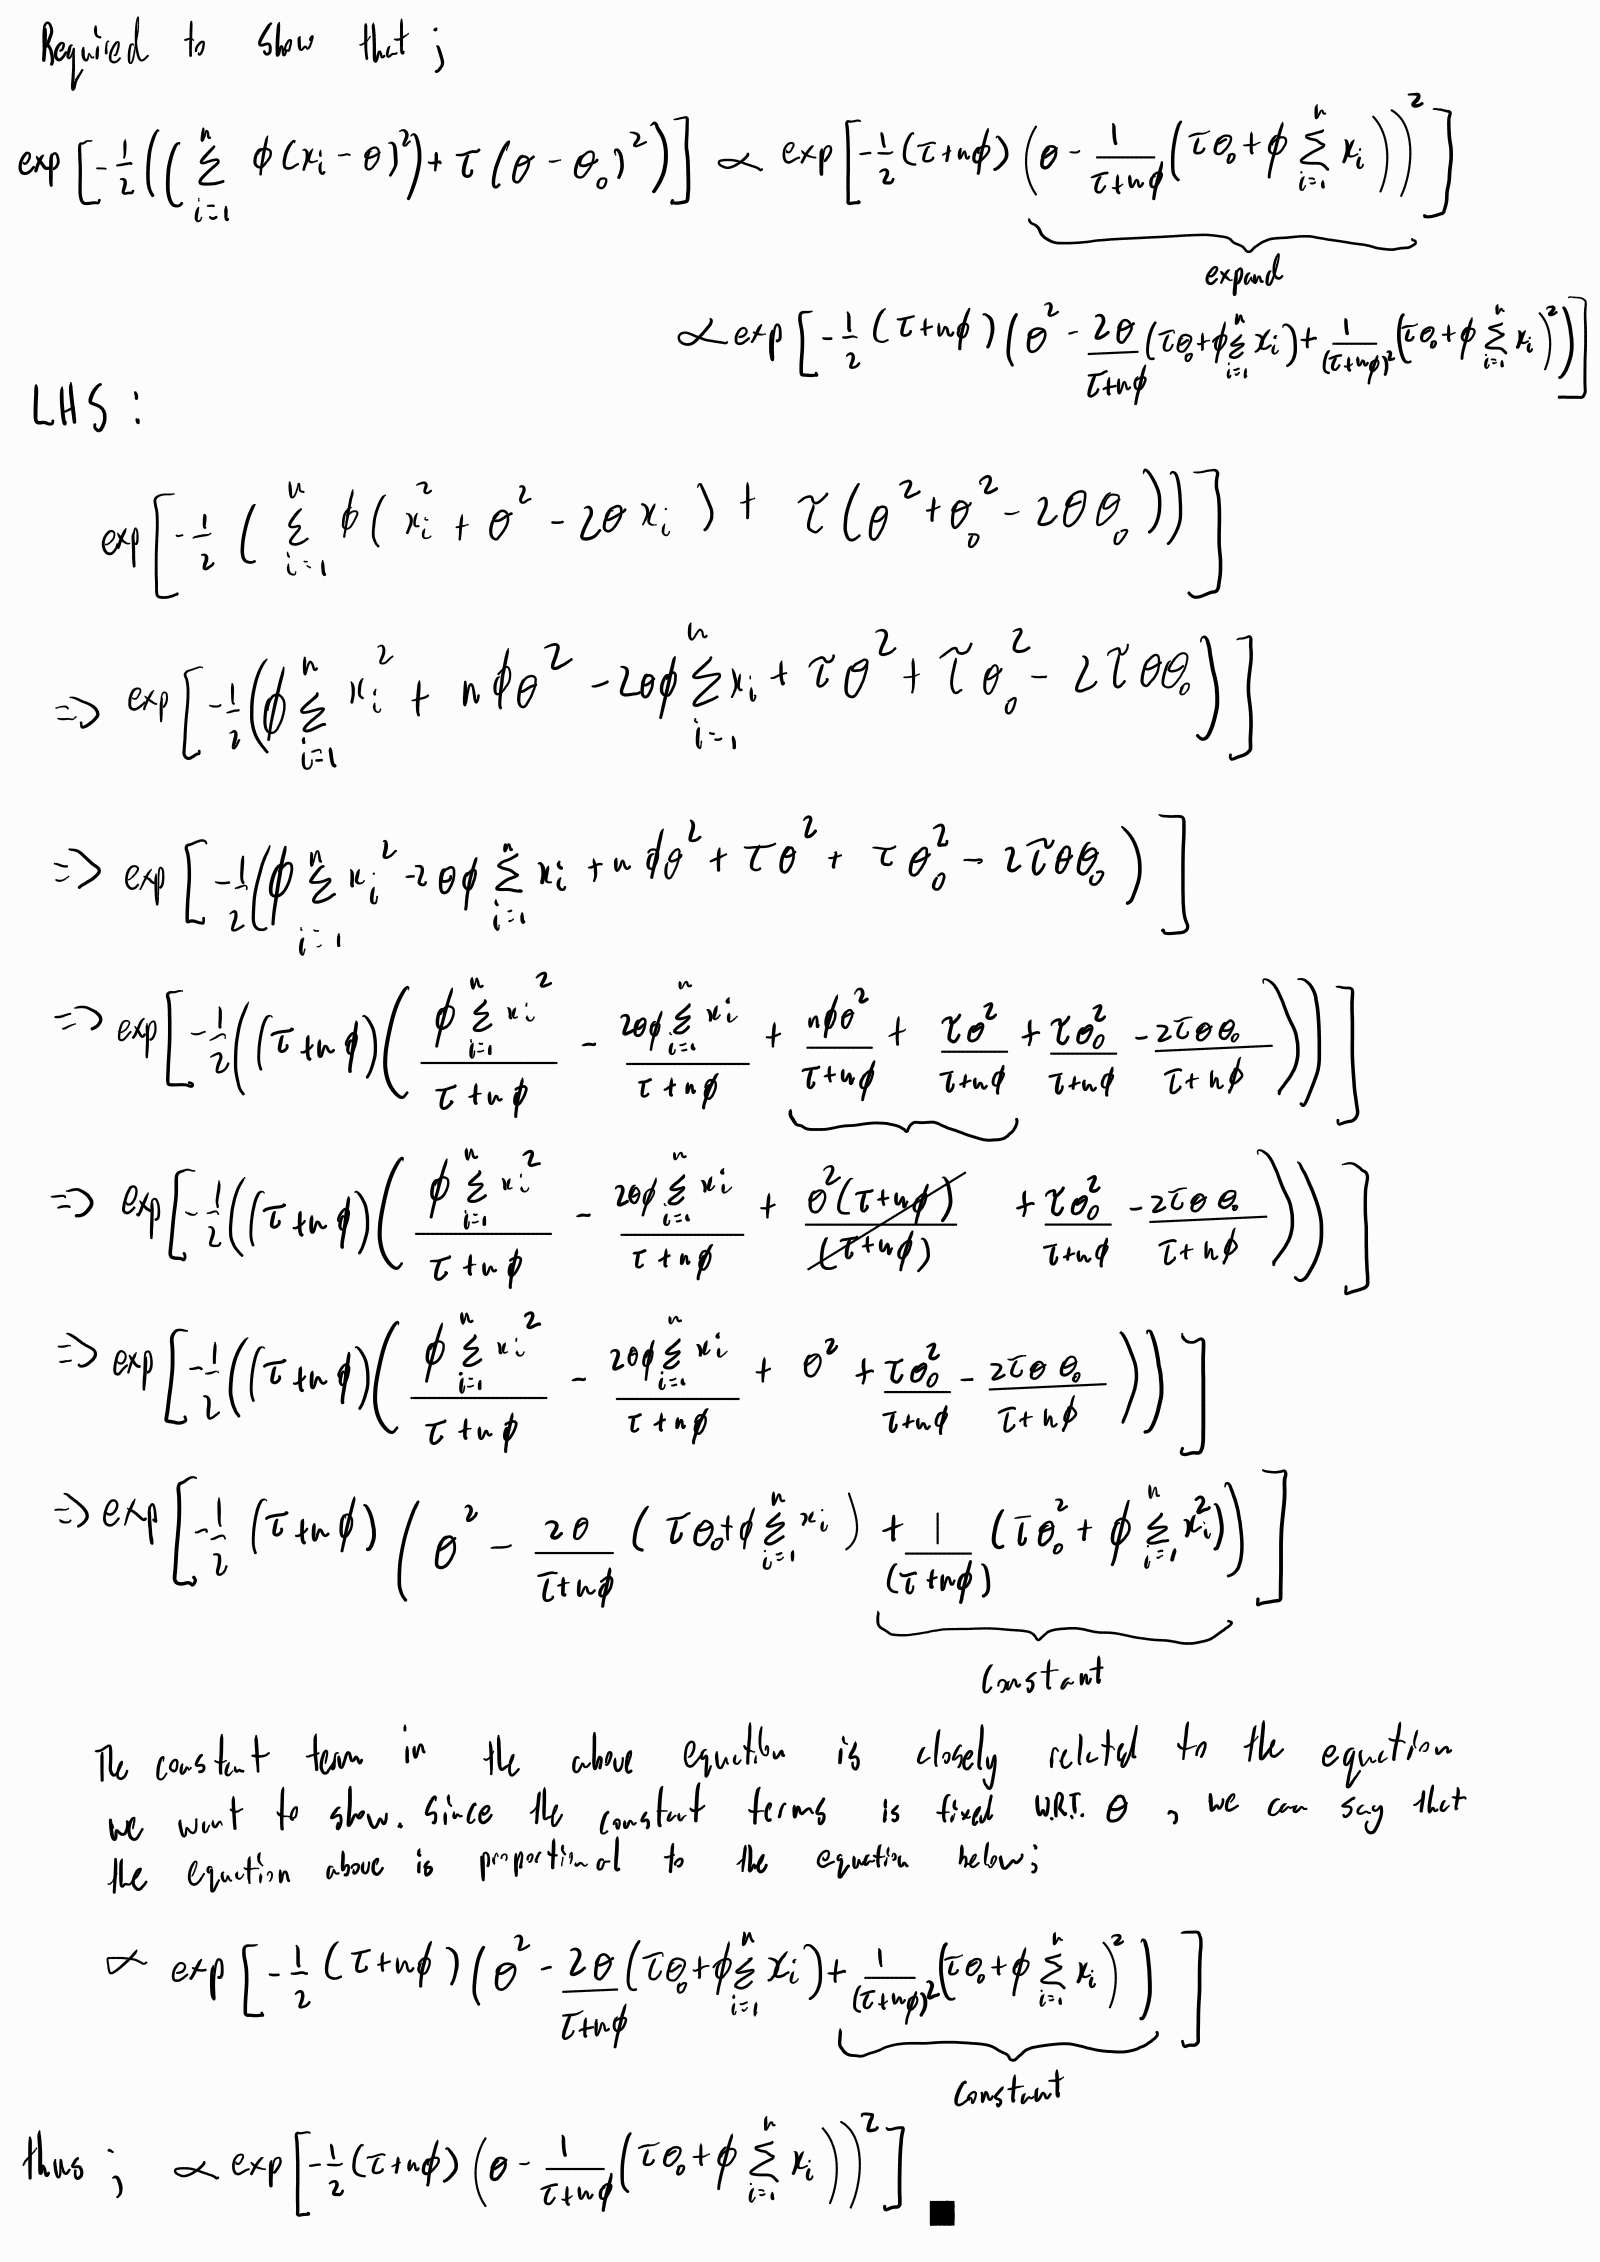

# Homework #2 Part II:

**Q 1:** Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation.

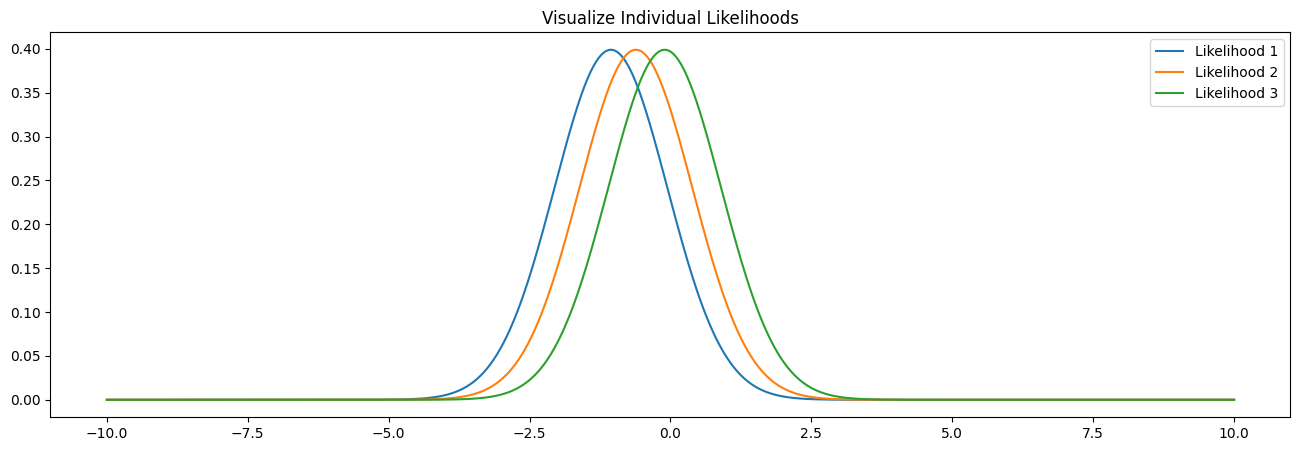

In [167]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

plt.figure(figsize=(16,5)); 
n = 3
xsum = 0
c,c2 = 500,10; 
likelihoods = []

for i in range(n):
    x = stats.norm(loc=0,scale=1).rvs(1); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001);
    likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0) # sigma=1 known
    plt.plot(parameter_domain, likelihood, label="Likelihood "+str(i+1)+"")
    xsum += x[0]
    likelihoods.append(likelihood)

plt.title("Visualize Individual Likelihoods")
plt.legend();

We can add the prior, posterior, joint and combined likelihoods in the plot shown below:

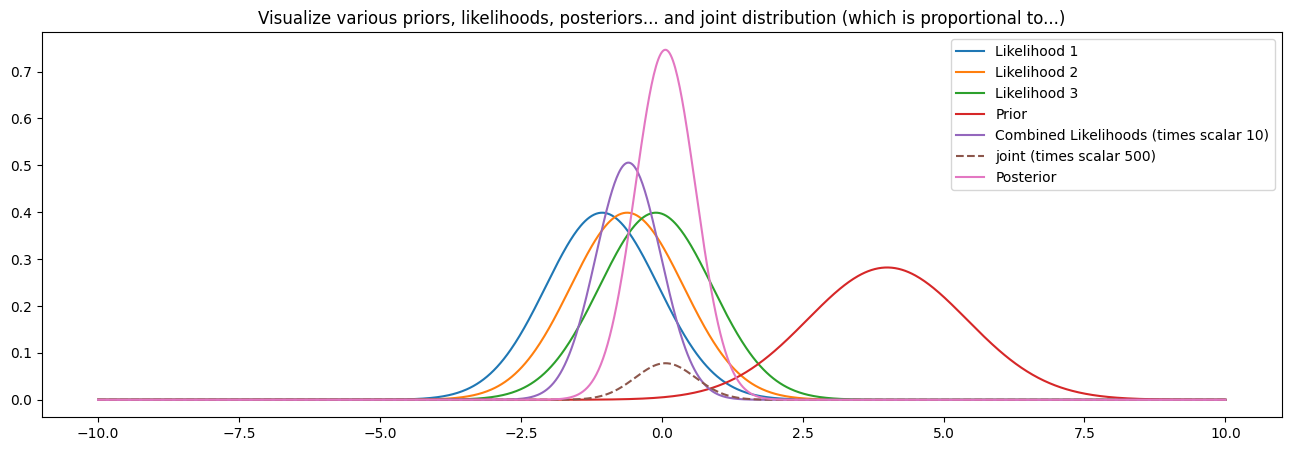

In [175]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

plt.figure(figsize=(16,5)); 
n = 3
c,c2 = 500,10;

for i in range(len(likelihoods)):
    plt.plot(parameter_domain, likelihoods[i], label="Likelihood "+str(i+1)+"")

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
plt.plot(parameter_domain, prior, label="Prior")

combined_likelihoods = np.prod(np.array(likelihoods),axis=0)
plt.plot(parameter_domain, combined_likelihoods * c2, label="Combined Likelihoods (times scalar "+str(c2)+")")

joint = c*combined_likelihoods*prior # elementwise multiplication
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")")

posterior = stats.norm(loc=(tau*theta_0+xsum)/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
plt.plot(parameter_domain, posterior, label="Posterior")

plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")
plt.legend();

**Q 2:** Make the "Classic Bayes" figure for the normal-normal model on a log scale.

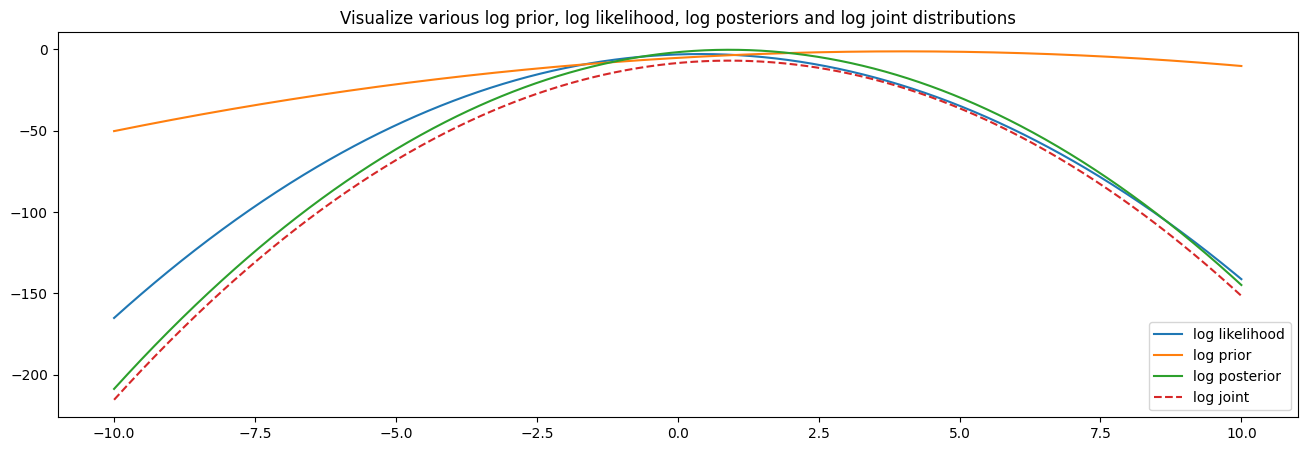

In [185]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001); 

likelihood = np.sum(stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                                        loc=parameter_domain, scale=1), axis=0) # sigma=1 known

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) # What if p(theta) = 1?

joint = likelihood + prior # elementwise addition 
posterior = stats.norm(loc=(tau*theta_0 + x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)

plt.figure(figsize=(16,5)); 
plt.plot(parameter_domain, likelihood, label="log likelihood"); 
plt.plot(parameter_domain, prior, label="log prior"); 
plt.plot(parameter_domain, posterior, label="log posterior"); 
plt.plot(parameter_domain, joint, linestyle="--", label="log joint"); 
plt.legend(); plt.title("Visualize various log prior, log likelihood, log posteriors and log joint distributions"); 

**Q 3:** What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?

A posterior distribution of a normal likelihood with $P(\theta) \propto 1$ would be that of a normal distribution. The Bayes equation is given by the formula: $P(\theta|x)=\frac{L(\theta|x).P(\theta)}{P(x)}$, where; $L(\theta|x)$ is the likelihood function (in this case the likelihood function is normal), $P(\theta)$ is the Prior distribution (which in this case is proportional to 1) and $P(x)$ is the marginal likelihood (also known as the normalizing constant). Ignoring the marginal likelihood we know that the posterior is proportional to the joint or $P(\theta|x) \propto L(\theta|x).P(\theta)$. Since $P(\theta) \propto 1$ we have $P(\theta|x) \propto L(\theta|x).1$ and thus the posterior should be proportional to the likelihood function. Deriving this equation gives us that $P(\theta|x) \propto exp(-\frac{\phi n}{2}(\theta-\bar{x}^2))$ where $\phi = \frac{1}{\sigma^2}$, where $\sigma^2$ is the variance. Thus the posterior distribution, $\theta|x$ ~ $N(\bar{x},\frac{1}{\phi n})$. 

**Q 4:** What's the difference between a likelihood and posterior when improper prior is used?

Improper priors are priors that do not integrate to 1 or guarantee proper posteriors (a proper posterior distribution integrates or sums (for discrete parameters) to 1 over the entire parameter space). We can compare the differences when using an improper prior between the likelihood function and the posterior by using the Bayes formula: $P(\theta|x)=\frac{L(\theta|x).P(\theta)}{P(x)}$. Looking at the formula, we can see that the likelihood function is solely contingent on data and model parameters and does not rely on the choice of prior, whether it be improper or not (this would also apply to the log-likelihood function). The posterior, however, can be impacted by an improper prior not only through the $P(\theta)$ part of the formula (shown in Q3), but also through the normalizing constant/ marginal likelihood of $P(x)$, which can be simply looked as $\int{f(x|\theta)P(\theta)d\theta}$, where $x$ is the sample, $f(x|\theta)$ is the sampling density, which is proportional to the model likelihood, and $P(\theta)$ is the prior density. When we have an improper prior, it means that $P(\theta)$ is not a proper probability distribution, and as a result, the term $P(\theta)$ might not integrate to one or does not even converge, leading to $P(x)$ to be undefined or infinite (which greatly affects the normalization of the Posterior). This, however, is not always the case as an informative likelihood, when partnered with an improper prior $P(\theta) \propto 1$, has the potential to yield a proper posterior. An example of this would be the posterior distribution in Q3, with the integral of the likelihood and prior product being finite and normalized by the marginal likelihood constant.